In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime, date

sns.set_style('darkgrid')
%matplotlib inline

## **Limpieza/formateo**

In [2]:
Postulaciones_Edad = pd.read_csv('../data/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')
Postulaciones_Estudios= pd.read_csv('../data/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')

In [3]:
print ("Existen ", len(Postulaciones_Estudios), " registros con estudios")
print ("Existen ", len(Postulaciones_Edad), " registros con sexo y genero")

print("El", round(100 * Postulaciones_Estudios['idpostulante'].isnull().sum()/len(Postulaciones_Estudios), 2), "% de los datos de la columna idpostulante del set de estudios son nulos")
print("El", round(100 * Postulaciones_Edad['idpostulante'].isnull().sum()/len(Postulaciones_Edad), 2), "% de los datos de la columna idpostulante del set de edades son nulos")

Existen  298231  registros con estudios
Existen  200888  registros con sexo y genero
El 0.0 % de los datos de la columna idpostulante del set de estudios son nulos
El 0.0 % de los datos de la columna idpostulante del set de edades son nulos


In [4]:
Postulaciones_Estudios['idpostulante'].value_counts()

YlMLGD     9
EZD29      8
54MQGz     8
12eO0B     7
aa1KkD     7
Ee2ok0     7
zv8vOxE    7
8KOd6x     7
9692125    7
xk9VKeV    7
kPNrbZV    7
YNVjEr     7
8M21pBL    7
55R18N     7
Ez0LBk9    7
8keBRO     7
1BodWQ     7
8AZKkO     6
3NkbZwr    6
owarwYZ    6
2zLX4QY    6
2zmO1dY    6
ow5oYE4    6
e9BNrp     6
jk6WmM6    6
EzZv6Jo    6
6r5m8zr    6
1ZYPM3     6
63Rmv4     6
5JZzxZ     6
          ..
Nzr8964    1
bOVw2zB    1
VNrQ0QN    1
QNr4dOq    1
ow2pm8Z    1
pzdbrkM    1
BmDM0Bw    1
jk5rmeB    1
zvxNdYD    1
VNr841E    1
Eqx14z     1
OqP61b6    1
aGpaZq     1
KBdP0Bj    1
ekObL6r    1
bOjlrRB    1
kPBoX0j    1
YjNpK8D    1
W9Wr3PX    1
qe2MpKk    1
zvaZ05K    1
MVr3q8K    1
akj8rYN    1
ow2daQL    1
a5NDq0     1
5mP4M1w    1
wVYXkDp    1
ekNXml2    1
8QNqzD     1
QNr1el4    1
Name: idpostulante, Length: 188752, dtype: int64

In [5]:
Postulaciones_Estudios.loc[Postulaciones_Estudios['idpostulante'] == 'YlMLGD']

,idpostulante,nombre,estado
373,YlMLGD,Terciario/Técnico,En Curso
374,YlMLGD,Otro,En Curso
375,YlMLGD,Universitario,En Curso
2206,YlMLGD,Terciario/Técnico,Graduado
2207,YlMLGD,Universitario,Graduado
2208,YlMLGD,Otro,Graduado
2209,YlMLGD,Posgrado,Graduado
3659,YlMLGD,Universitario,Abandonado
3660,YlMLGD,Terciario/Técnico,Abandonado


In [6]:
def cuantificar_estudios(row):
    if (row['nombre'] == 'Doctorado'):
        row['nombre'] = 7
    if (row['nombre'] == 'Master'):    
        row['nombre'] = 6
    if (row['nombre'] == 'Posgrado'):    
        row['nombre'] = 5
    if (row['nombre'] == 'Universitario'):    
        row['nombre'] = 4
    if (row['nombre'] == 'Terciario/Técnico'):    
        row['nombre'] = 3
    if (row['nombre'] == 'Secundario'):    
        row['nombre'] = 2
    if (row['nombre'] == 'Otro'):    
        row['nombre'] = 1    
        
    if (row['estado'] == 'Graduado'):
        row['estado'] = 3
    if (row['estado'] == 'En Curso'):    
        row['estado'] = 2
    if (row['estado'] == 'Abandonado'):    
        row['estado'] = 1
        
    return row    

def descuantificar_estudios(row):
    if (row['nombre'] == 7):
        row['nombre'] = 'Doctorado'
    if (row['nombre'] == 6):    
        row['nombre'] = 'Master'
    if (row['nombre'] == 5):    
        row['nombre'] = 'Posgrado'
    if (row['nombre'] == 4):    
        row['nombre'] = 'Universitario'
    if (row['nombre'] == 3):    
        row['nombre'] = 'Terciario/Técnico'
    if (row['nombre'] == 2):    
        row['nombre'] = 'Secundario'
    if (row['nombre'] == 1):    
        row['nombre'] = 'Otro'    
        
    if (row['estado'] == 3):
        row['estado'] = 'Graduado'
    if (row['estado'] == 2):    
        row['estado'] = 'En Curso'
    if (row['estado'] == 1):    
        row['estado'] = 'Abandonado'
        
    return row    

In [7]:
Postulaciones_Estudios.apply(lambda row: cuantificar_estudios(row), axis=1)
Postulaciones_Estudios.head(1)

,idpostulante,nombre,estado
0,NdJl,5,2


In [8]:
grouped_postulantes = Postulaciones_Estudios.groupby('idpostulante')

In [9]:
print('Existen ', len(grouped_postulantes), ' postulantes diferentes con estudios registrados')

Existen  188752  postulantes diferentes con estudios registrados


In [10]:
grouped_postulantes = Postulaciones_Estudios.groupby('idpostulante').apply(lambda g: g.sort_index(by='nombre', ascending=False).head(1))

/home/tbotalla/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [11]:
grouped_postulantes.reset_index(drop=True, inplace=True)
Postulaciones_Estudios = grouped_postulantes
Postulaciones_Estudios.apply(lambda row: descuantificar_estudios(row), axis=1)
Postulaciones_Estudios.loc[grouped_postulantes['idpostulante'] == 'YlMLGD']

,idpostulante,nombre,estado
117605,YlMLGD,Posgrado,Graduado


In [12]:
postulantes = pd.merge(Postulaciones_Estudios, Postulaciones_Edad, on =['idpostulante'])

In [13]:
postulantes.head(1)

,idpostulante,nombre,estado,fechanacimiento,sexo
0,0z5VvGv,Secundario,Graduado,1987-10-18,MASC


In [14]:
del Postulaciones_Estudios
del Postulaciones_Edad

## **Edad y Género**

In [15]:
postulantes['sexo'].value_counts()

FEM           97003
MASC          89016
NO_DECLARA     2733
Name: sexo, dtype: int64

### **Limpieza**

In [16]:
postulantes['fechanacimiento'].isnull().sum()

2874

In [17]:
postulantes = postulantes.dropna().reset_index()
del postulantes['index']

In [18]:
postulantes['fechanacimiento'].isnull().sum()

0

In [19]:
postulantes.head(1)

,idpostulante,nombre,estado,fechanacimiento,sexo
0,0z5VvGv,Secundario,Graduado,1987-10-18,MASC


In [20]:
postulantes['fechanacimiento']= pd.to_datetime(postulantes['fechanacimiento'],errors = 'coerce', format='%Y-%m-%d')

In [21]:
postulantes = postulantes.dropna().reset_index()

In [22]:
postulantes['sexo'].value_counts()

FEM           96729
MASC          88732
NO_DECLARA      411
Name: sexo, dtype: int64

In [23]:
def calculate_age(year, month, day):
    today = date.today()
    return today.year - year - ((today.month, today.day) < (month, day))

postulantes['edad'] = postulantes['fechanacimiento'].map(lambda x: calculate_age(x.year,x.month,x.day))

In [24]:
postulantes.dtypes

index                       int64
idpostulante               object
nombre                     object
estado                     object
fechanacimiento    datetime64[ns]
sexo                       object
edad                        int64
dtype: object

In [25]:
postulantes['edad'].isnull().sum()

0

In [26]:
postulantes = postulantes.dropna().reset_index()

In [27]:
postulantes['edad'] = postulantes['edad'].astype(int)
del postulantes['index']

In [28]:
postulantes.dtypes

level_0                     int64
idpostulante               object
nombre                     object
estado                     object
fechanacimiento    datetime64[ns]
sexo                       object
edad                        int64
dtype: object

### **Postulantes con edad de jubilación**

In [29]:
edad_jubilacion_fem=60
edad_jubilacion_masc=65
edad_legal=18
cantidad_postulantes_fem=len(postulantes.loc[postulantes['sexo'] == 'FEM'])
cantidad_postulantes_masc=len(postulantes.loc[postulantes['sexo'] == 'MASC'])

In [30]:
postulantes_jubilables_fem = postulantes.loc[postulantes['edad'] > edad_jubilacion_fem]
postulantes_jubilables_fem = postulantes_jubilables_fem.loc[postulantes_jubilables_fem['sexo'] == 'FEM']
postulantes_jubilables_fem.head(3)

,level_0,idpostulante,nombre,estado,fechanacimiento,sexo,edad
1253,1253,0zP3W2r,Secundario,Graduado,1950-08-26,FEM,67
1916,1916,0zPRGGd,Secundario,Graduado,1954-01-22,FEM,64
5018,5018,144z5B,Posgrado,Graduado,1957-03-21,FEM,61


In [31]:
print('El ', round(100 * len(postulantes_jubilables_fem)/cantidad_postulantes_fem, 2), '% de las postulantes mujeres están en edad de jubilación')

El  0.11 % de las postulantes mujeres están en edad de jubilación


In [32]:
postulantes_jubilables_masc = postulantes.loc[postulantes['edad'] > edad_jubilacion_masc]
postulantes_jubilables_masc = postulantes_jubilables_masc.loc[postulantes_jubilables_masc['sexo'] == 'MASC']
postulantes_jubilables_masc.head(3)

,level_0,idpostulante,nombre,estado,fechanacimiento,sexo,edad
19559,19559,4rePXEA,Doctorado,Graduado,1949-06-15,MASC,68
20259,20259,52DWRk,Universitario,Graduado,1946-12-03,MASC,71
20889,20889,59rBOv,Universitario,Abandonado,1951-01-01,MASC,67


In [33]:
print('El ', round(100 * len(postulantes_jubilables_masc)/cantidad_postulantes_masc, 2), '% de los postulantes hombres están en edad de jubilación')

El  0.08 % de los postulantes hombres están en edad de jubilación


### **Postulantes menores de edad**

In [34]:
postulantes_menores = postulantes.loc[postulantes['edad'] < edad_legal]
postulantes_menores.head(3)

,level_0,idpostulante,nombre,estado,fechanacimiento,sexo,edad
911,911,0zNWeJM,Secundario,Graduado,2000-05-16,FEM,17
1127,1127,0zP1Xaq,Secundario,Graduado,2000-04-17,FEM,17
1416,1416,0zP9Nxr,Secundario,Graduado,2000-06-02,FEM,17


In [35]:
print('El ', round(100 * len(postulantes_menores)/len(postulantes), 2), '% de los postulantes son menores de edad')

El  0.07 % de los postulantes son menores de edad


In [36]:
print('Representan el ', round(100 * (len(postulantes_menores) + len(postulantes_jubilables_fem) + len(postulantes_jubilables_masc))/len(postulantes), 2), '% del total de postulantes')

Representan el  0.16 % del total de postulantes


### **Distribución edades**

In [37]:
postulantes['edad'].value_counts()

26     11584
25     11358
24     11165
27     11087
23     10917
22     10310
28      9557
21      9209
29      9109
30      8053
31      7545
20      7377
32      6619
33      5672
19      5397
34      5304
35      4828
36      4561
37      3979
38      3692
39      3283
40      2871
41      2491
18      2382
42      2205
43      2010
44      1604
45      1415
46      1383
47      1210
       ...  
52       606
53       599
54       543
55       444
56       426
57       356
58       267
59       227
61       174
60       152
17       121
62       102
63        65
64        44
67        30
65        25
66        16
68        14
69         6
70         6
75         5
71         3
73         2
242        1
100        1
74         1
76         1
78         1
96         1
12         1
Name: edad, Length: 64, dtype: int64

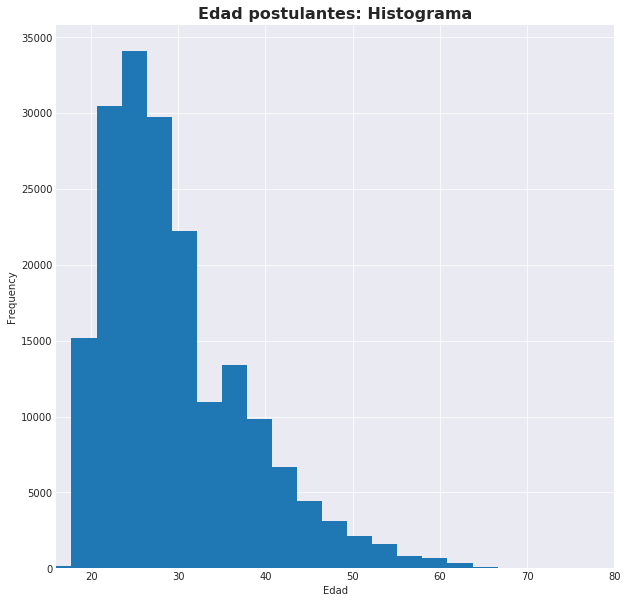

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Edad postulantes: Histograma', fontsize=16, fontweight='bold')
ax.set_xlabel('Edad')
ax.set_xlim([16,80])
postulantes['edad'].plot.hist(figsize=[10,10], bins=80)

In [39]:
P_Masculino_Edad = postulantes[postulantes['sexo']=='MASC']

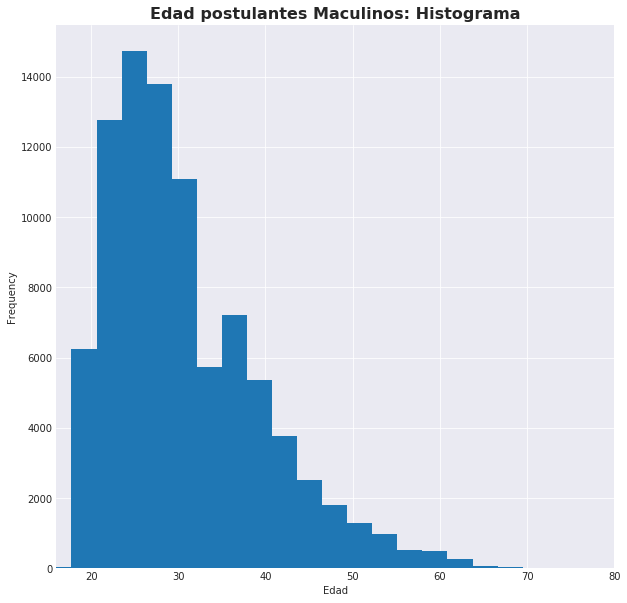

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Edad postulantes Maculinos: Histograma', fontsize=16, fontweight='bold')
ax.set_xlabel('Edad')
ax.set_xlim([16,80])
P_Masculino_Edad['edad'].plot.hist(figsize=[10,10], bins=80)

In [41]:
P_Femenino_Edad = postulantes[postulantes['sexo']=='FEM']

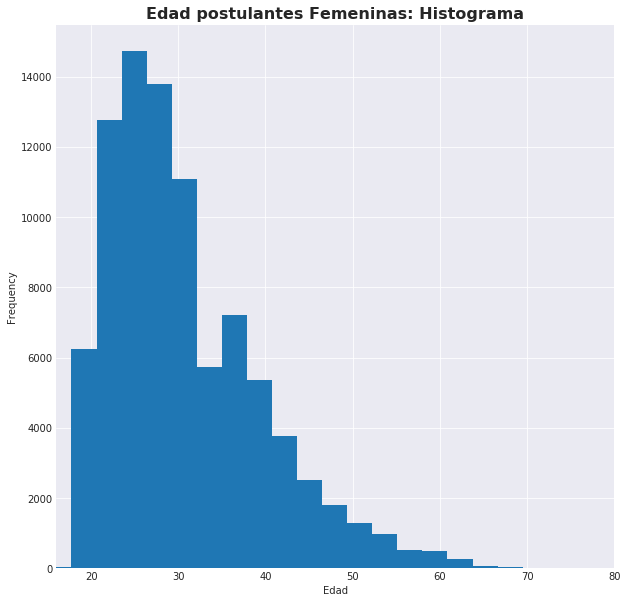

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Edad postulantes Femeninas: Histograma', fontsize=16, fontweight='bold')
ax.set_xlabel('Edad')
ax.set_xlim([16,80])
P_Masculino_Edad['edad'].plot.hist(figsize=[10,10], bins=80)

## Estudios

In [49]:
postulantes.head(3)

,level_0,idpostulante,nombre,estado,fechanacimiento,sexo,edad,cantidad
0,0,0z5VvGv,Secundario,Graduado,1987-10-18,MASC,30,0
1,1,0zB026d,Terciario/Técnico,Graduado,1978-02-23,FEM,40,0
2,2,0zB03O9,Terciario/Técnico,En Curso,1987-07-04,FEM,30,0


In [62]:
postulantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185872 entries, 0 to 185871
Data columns (total 8 columns):
level_0            185872 non-null int64
idpostulante       185872 non-null object
nombre             185872 non-null object
estado             185872 non-null object
fechanacimiento    185872 non-null datetime64[ns]
sexo               185872 non-null object
edad               185872 non-null int64
cantidad           185872 non-null int64
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 11.3+ MB


In [63]:
postulantes['nombre'].value_counts()

Universitario        86754
Secundario           61097
Terciario/Técnico    27046
Posgrado              6010
Master                3454
Otro                  1303
Doctorado              208
Name: nombre, dtype: int64

In [64]:
postulantes['estado'].value_counts()

Graduado      102442
En Curso       67428
Abandonado     16002
Name: estado, dtype: int64

In [65]:
Postulaciones_Graduados = postulantes
Postulaciones_Graduados['cantidad']=0
Postulaciones_Graduados= postulantes.loc[(postulantes['estado']=='Graduado')].groupby('nombre').count()

In [66]:
del Postulaciones_Graduados['idpostulante']
del Postulaciones_Graduados['estado']
del Postulaciones_Graduados['fechanacimiento']
del Postulaciones_Graduados['sexo']
del Postulaciones_Graduados['edad']
del Postulaciones_Graduados['level_0']

In [67]:
Postulaciones_Graduados

,cantidad
nombre,
Doctorado,102
Master,1821
Otro,874
Posgrado,3720
Secundario,55036
Terciario/Técnico,13148
Universitario,27741


In [68]:
plot_postulantes_graduados = 100 * Postulaciones_Graduados['cantidad']/len(postulantes.loc[(postulantes['estado']=='Graduado')])
plot_postulantes_graduados = pd.DataFrame(plot_postulantes_graduados).reset_index()

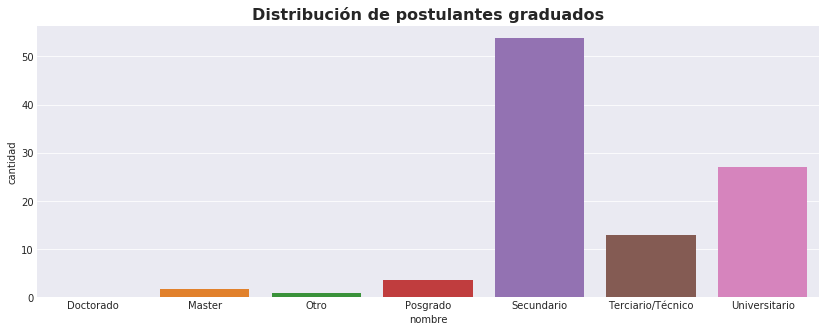

In [73]:
plt.figure(figsize=(14,5))
plt.title('Distribución de postulantes graduados', fontsize=16, fontweight='bold')
sns.barplot(x='nombre', y='cantidad', data=plot_postulantes_graduados)

In [74]:
postulantes_en_curso = postulantes
postulantes_en_curso['cantidad'] = 0
postulantes_en_curso= postulantes.loc[(postulantes['estado']=='En Curso')].groupby('nombre').count()

In [75]:
del postulantes_en_curso['idpostulante']
del postulantes_en_curso['estado']
del postulantes_en_curso['fechanacimiento']
del postulantes_en_curso['sexo']
del postulantes_en_curso['level_0']
del postulantes_en_curso['edad']

In [76]:
plot_postulantes_en_curso = 100 * postulantes_en_curso['cantidad']/len(postulantes.loc[(postulantes['estado']=='En Curso')])
plot_postulantes_en_curso = pd.DataFrame(plot_postulantes_en_curso).reset_index()

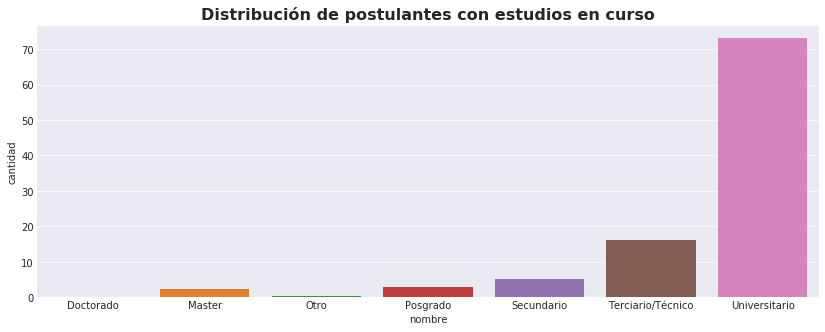

In [77]:
plt.figure(figsize=(14,5))
plt.title('Distribución de postulantes con estudios en curso', fontsize=16, fontweight='bold')
sns.barplot(x='nombre', y='cantidad', data=plot_postulantes_en_curso)

In [78]:
postulantes_abandonado = postulantes
postulantes_abandonado['cantidad'] = 0
postulantes_abandonado= postulantes.loc[(postulantes['estado']=='Abandonado')].groupby('nombre').count()

In [79]:
del postulantes_abandonado['idpostulante']
del postulantes_abandonado['estado']
del postulantes_abandonado['fechanacimiento']
del postulantes_abandonado['sexo']
del postulantes_abandonado['level_0']
del postulantes_abandonado['edad']

In [80]:
postulantes_abandonado = 100 * postulantes_abandonado['cantidad']/len(postulantes.loc[(postulantes['estado']=='En Curso')])
postulantes_abandonado = pd.DataFrame(postulantes_abandonado).reset_index()

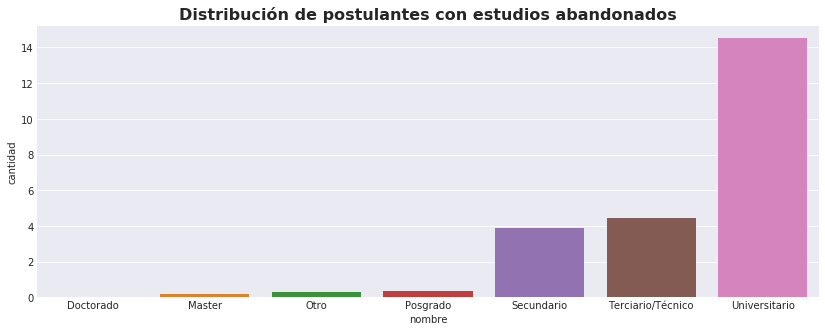

In [81]:
plt.figure(figsize=(14,5))
plt.title('Distribución de postulantes con estudios abandonados', fontsize=16, fontweight='bold')
sns.barplot(x='nombre', y='cantidad', data=postulantes_abandonado)

In [ ]:
# TODO:

In [158]:
Postulaciones_Estado_Promedio = Postulaciones_Estudios
Postulaciones_Estado_Promedio = Postulaciones_Estado_Promedio.groupby(['titulo','estadoTitulo']).agg({'cantidad':'count'})
Postulaciones_Estado_Promedio

cantidad
titulo            estadoTitulo          
Doctorado         Abandonado          15
                  En Curso            94
                  Graduado           105
Master            Abandonado         144
                  En Curso          1519
                  Graduado          1935
Otro              Abandonado         947
                  En Curso          4919
                  Graduado         18882
Posgrado          Abandonado         317
                  En Curso          2239
                  Graduado          4831
Secundario        Abandonado        3156
                  En Curso          3995
                  Graduado        103105
Terciario/Técnico Abandonado        5692
                  En Curso         15032
                  Graduado         27009
Universitario     Abandonado       14955
                  En Curso         50733
                  Graduado         38607

In [159]:
Postulaciones_Estado_Promedio= Postulaciones_Estado_Promedio.groupby(level=0).apply(lambda x: 100 * x / int(x.sum()))

In [160]:
Postulaciones_Estado_Promedio= Postulaciones_Estado_Promedio.reset_index()

In [161]:
Postulaciones_Estado_Promedio

,titulo,estadoTitulo,cantidad
0,Doctorado,Abandonado,7.009346
1,Doctorado,En Curso,43.925234
2,Doctorado,Graduado,49.065421
3,Master,Abandonado,4.002223
4,Master,En Curso,42.217899
5,Master,Graduado,53.779878
6,Otro,Abandonado,3.826572
7,Otro,En Curso,19.876354
8,Otro,Graduado,76.297075
9,Posgrado,Abandonado,4.291323


In [162]:
Postulaciones_Graduados_Promedio= Postulaciones_Estado_Promedio.loc[Postulaciones_Estado_Promedio['estadoTitulo']=='Graduado']

In [163]:
Postulaciones_Graduados_Promedio = Postulaciones_Graduados_Promedio.set_index('titulo')
Postulaciones_Graduados_Promedio

,estadoTitulo,cantidad
titulo,,
Doctorado,Graduado,49.065421
Master,Graduado,53.779878
Otro,Graduado,76.297075
Posgrado,Graduado,65.398673
Secundario,Graduado,93.514185
Terciario/Técnico,Graduado,56.583496
Universitario,Graduado,37.017115


In [164]:
Postulaciones_Graduados_Promedio= Postulaciones_Graduados_Promedio.sort_values(by='cantidad')

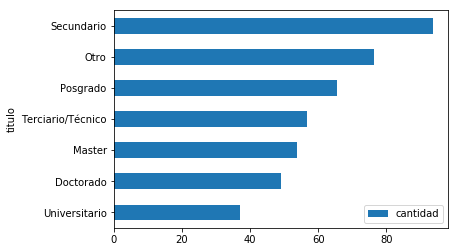

In [165]:
Postulaciones_Graduados_Promedio.plot(kind='barh')